In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
import numpy as np

In [3]:
directory='./'
dcr=pd.read_table(directory+ '7DCR.txt', decimal=',', delim_whitespace=True, names=['array','pix', 'dcr'])

In [4]:
directory='./'
rts=pd.read_table(directory+ '7RTS.txt', decimal=',', delim_whitespace=True, names=['array','pix', 'dcr'])

In [5]:
result = pd.merge(dcr, rts, on=['array', 'pix'], how='outer')

C:\Users\utente\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\utente\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


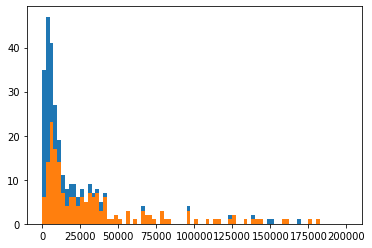

In [6]:
plt.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_x, bins=80, range=(0, 200000), label='DCR')
plt.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_y, bins=80, range=(0, 200000), label='DCR RTS pixels')
plt.show()

In [27]:
bini=np.concatenate([np.arange(0, 10000, 2000), np.arange(10000, 200000, 40000)])
hista, bin_edges = np.histogram(result.query('not ((dcr_y-dcr_x)>1)').dcr_x, bins=bini, density=False)
histb, bin_edges = np.histogram(result.query('not ((dcr_y-dcr_x)>1)').dcr_y, bins=bini, density=False)

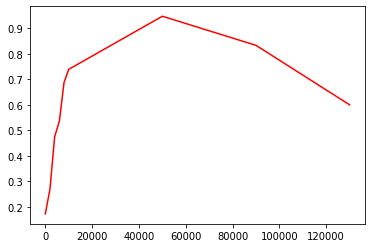

In [28]:
plt.plot(bin_edges[:-1], histb/hista, color='red')

C:\Users\utente\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\utente\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


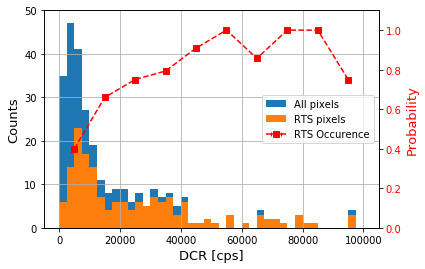

In [81]:
a=plt.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_x, bins=10, range=(0, 100000), label='All pixels')
b=plt.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_y, bins=10, range=(0, 100000), label='RTS pixels')
plt.close()

fig, ax1 = plt.subplots()

ax1.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_x, bins=40, range=(0, 100000), label='All pixels', alpha=1)
ax1.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_y, bins=40, range=(0, 100000), label='RTS pixels', alpha=1)
ax1.set_xlabel('DCR [cps]', size=13)
ax1.set_ylabel('Counts', size=13)
#ax1.tick_params(axis='Counts')
ax1.grid()
#ax1.legend(loc=5)

ax2 = ax1.twinx()
ax2.errorbar(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*1, xerr=0.5000,  fmt='--s', ecolor='red', capsize=2,  label='RTS occurence probability', color='red', alpha=0.99 )
ax1.errorbar(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*(-100), xerr=0.5000,  fmt='--s', ecolor='red', capsize=2,  label='RTS Occurence', color='red', alpha=0.99 )

#ax2.plot(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*1,'--s',  label='RTS occurence probability', color='red', )
#ax2.scatter(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*1, marker='s', label='RTS occurence probability', color='red')
#ax2.plot(bin_edges[:-1], histb/hista, '--s', color='red')
ax2.tick_params(axis='y', labelcolor='red')
#ax1.set_xlabel('time (s)')
ax2.set_ylabel('Probability', color='red', size=13)
ax2.set_ylim(0,1.05)
ax1.legend(loc=5)

ax1.set_ylim(0, 50)
ax2.set_ylim(0, 1.1)

plt.savefig('./img/7DCR_dist.png', bbox_inches='tight', dpi = 300)
plt.savefig('./img/7DCR_dist.pdf', bbox_inches='tight', dpi = 300)


#plt.yscale('log')
plt.show()

C:\Users\utente\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\utente\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


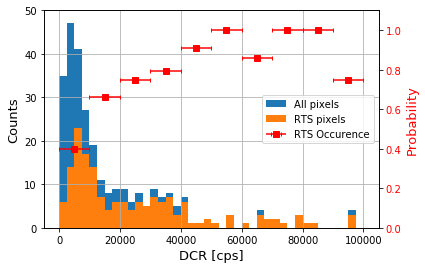

In [82]:
a=plt.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_x, bins=10, range=(0, 100000), label='All pixels')
b=plt.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_y, bins=10, range=(0, 100000), label='RTS pixels')
plt.close()

fig, ax1 = plt.subplots()

ax1.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_x, bins=40, range=(0, 100000), label='All pixels', alpha=1)
ax1.hist(result.query('not ((dcr_y-dcr_x)>1)').dcr_y, bins=40, range=(0, 100000), label='RTS pixels', alpha=1)
ax1.set_xlabel('DCR [cps]', size=13)
ax1.set_ylabel('Counts', size=13)
#ax1.tick_params(axis='Counts')
ax1.grid()
#ax1.legend()

ax2 = ax1.twinx()
ax2.errorbar(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*1, xerr=5000,  fmt='s', ecolor='red', capsize=2,  label='RTS Occurence', color='red', alpha=0.99 )
ax1.errorbar(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*(-100), xerr=0.5000,  fmt='--s', ecolor='red', capsize=2,  label='RTS Occurence', color='red', alpha=0.99 )


#ax2.plot(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*1,'--s',  label='RTS occurence probability', color='red', )
#ax2.scatter(a[1][:-1]+(a[1][1]-a[1][0])/2, b[0]/a[0]*1, marker='s', label='RTS occurence probability', color='red')
#ax2.plot(bin_edges[:-1], histb/hista, '--s', color='red')
ax2.tick_params(axis='y', labelcolor='red')
#ax1.set_xlabel('time (s)')
ax2.set_ylabel('Probability', color='red', size=13)
ax2.set_ylim(0,1.05)
#ax1.legend()

ax1.legend(loc=5)

ax1.set_ylim(0, 50)
ax2.set_ylim(0, 1.1)

plt.savefig('./img/7DCR_dist_01.png', bbox_inches='tight', dpi = 300)
plt.savefig('./img/7DCR_dist_01.pdf', bbox_inches='tight', dpi = 300)


#plt.yscale('log')
plt.show()